In [ ]:
from langgraph.graph import StateGraph, START, END  
from typing import TypedDict
from euriai.langchain import create_chat_model
from dotenv import load_dotenv
import os
load_dotenv()  # Load environment variables from .env file
api_key = os.getenv("key")  # Retrieve the API key from environment variables

In [ ]:
chat_model = create_chat_model(
    api_key=api_key,
    model="gpt-4.1-nano",
    temperature=0.7
)
response = chat_model.invoke("What is artificial intelligence?")
print(response.content)

Artificial intelligence (AI) refers to the simulation of human intelligence processes by machines, especially computer systems. These processes include learning (the ability to improve performance based on experience), reasoning (the ability to draw conclusions from data), problem-solving, understanding natural language, perception (such as vision or speech recognition), and decision-making. AI can be categorized into narrow AI, which is designed for specific tasks like voice assistants or recommendation systems, and general AI, which would possess the ability to perform any intellectual task a human can do—though the latter remains a theoretical goal at this point. Overall, AI aims to create systems that can perform tasks that typically require human intelligence, enhancing automation, efficiency, and new capabilities across various fields.


In [4]:
## Define the state

class LLMState(TypedDict):
    question: str
    answer: str

In [9]:
def llm_qa(state: LLMState) -> LLMState:

    question = state["question"]
    prompt = f"Answer the following question: {question}"
    response = chat_model.invoke(prompt)
    state["answer"] = response.content
    return state

In [10]:
## Define the graph
llm_graph = StateGraph(LLMState)

## Add nodes to the graph
llm_graph.add_node("askQuestion", llm_qa)

## Add edges to the graph
llm_graph.add_edge(START, "askQuestion")
llm_graph.add_edge("askQuestion", END)

## compile the graph
workflow = llm_graph.compile()

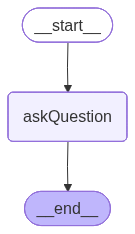

In [11]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [12]:
## execute the workflow
initial_state = {"question": "What is artificial intelligence?"}
final_state = workflow.invoke(initial_state)  
final_state  

{'question': 'What is artificial intelligence?',
 'answer': 'Artificial Intelligence (AI) is the branch of computer science focused on creating systems or machines that can perform tasks typically requiring human intelligence. These tasks include learning from experience, understanding natural language, recognizing patterns, solving problems, and making decisions. AI can be classified into narrow AI, which is designed for specific tasks, and general AI, which would possess broader, human-like intelligence.'}